In [2]:
from data_loader import load_data
from profiler import update_strategies_profile_info, plot_profile_by_input, calculate_profile
from strategies import NaiveMovingAverageStrategy, WindowedMovingAverageStrategy, NaiveMovingAverageStrategyOpti_memo, NaiveMovingAverageStrategyOpti_Numpy, NaiveMovingAverageStrategyOpti_generator, WindowedMovingAverageStrategy_Opt
import contextlib, io

In [3]:
# load data
data_points = load_data() # tick data points

In [ ]:
# Strateies Comparison b/w befor optimization and after optimization
# about time, memory consumption with input size 100K 
input_sizes = [100_000] 
strategies_info = {
        'naiveMA_befor_opt': {
            'strategy': NaiveMovingAverageStrategy(),
            'runtime_summary': [],
            'memory_summary': [],
            'input_sizes': input_sizes
        },
        'naiveMA_after_opt': {
            'strategy': NaiveMovingAverageStrategyOpti_generator(),
            'runtime_summary': [],
            'memory_summary': [],
            'input_sizes': input_sizes
        },
    }

# 3. profile for each strategy
update_strategies_profile_info(strategies_info, data_points)

======================================== TIMEIT RESULT ========================================
Execution time: 0.040868 seconds
======================================== MEMORY PROFILER RESULT ========================================
Peak memory usage: 234.06 MiB
======================================== TIMEIT RESULT ========================================
Execution time: 0.000004 seconds
======================================== MEMORY PROFILER RESULT ========================================
Peak memory usage: 213.31 MiB


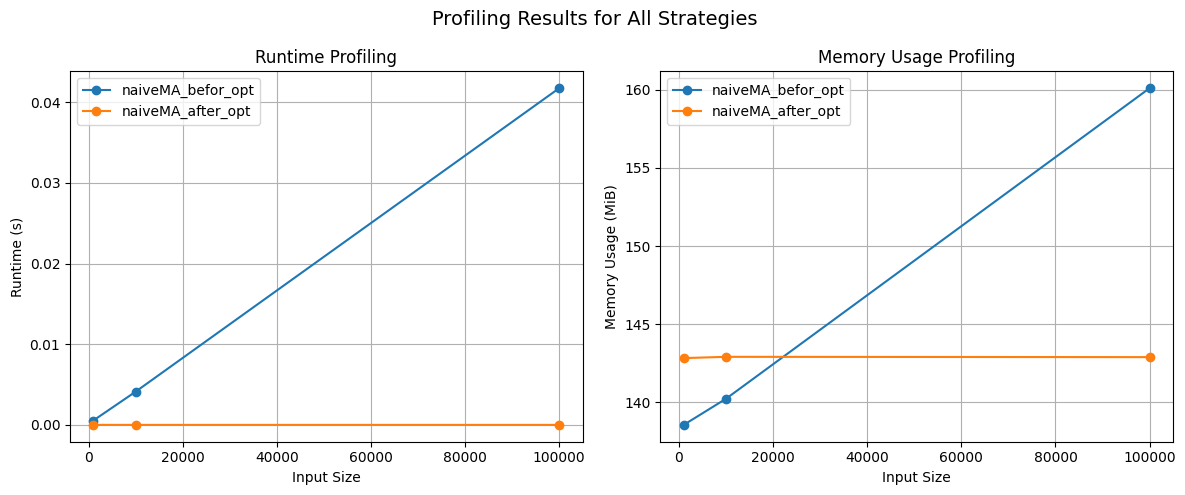

In [ ]:
input_sizes = [1000, 10_000, 100_000]
strategies_info = {
        'naiveMA_befor_opt': {
            'strategy': NaiveMovingAverageStrategy(),
            'runtime_summary': [],
            'memory_summary': [],
            'input_sizes': input_sizes
        },
        'naiveMA_after_opt': {
            'strategy': NaiveMovingAverageStrategyOpti_generator(),
            'runtime_summary': [],
            'memory_summary': [],
            'input_sizes': input_sizes
        },
    }
# to generate graph excpet print output from 'calculate_profile' function.
f = io.StringIO()
with contextlib.redirect_stdout(f):
    for strategy_map in strategies_info.values():
        strategy = strategy_map['strategy']
        for tick_size in strategy_map['input_sizes']:
            profile = calculate_profile(strategy.generate_signals, data_points, tick_size=tick_size)
            strategy_map['runtime_summary'].append(profile['timeit'])
            strategy_map['memory_summary'].append(profile['memory_usage'])

# output results
plot_profile_by_input(strategies_info)

%%markdown

# Strategies Comparison: Before vs After Optimization (100K ticks)

<table>
<tr>
<th>Strategy</th>
<th>Execution Time (s)</th>
<th>Peak Memory (MiB)</th>
</tr>
<tr>
<td>NaiveMovingAverageStrategy (Before Opt)</td>
<td>0.041</td>
<td>234.1</td>
</tr>
<tr>
<td>NaiveMovingAverageStrategyOpti_generator (After Opt)</td>
<td>0.000004</td>
<td>213.3</td>
</tr>
</table>

<p style="font-size:0.9em;">
- Runtime drastically reduced after optimization.<br>
- Memory usage slightly improved, still below 250 MiB.<br>
- Optimization effective for large-scale dataset (100K ticks).
</p>


In [4]:
# Strateies Comparison b/w befor optimization and after optimization
# about time, memory consumption with input size 100K 
input_sizes = [100_000] 
strategies_info = {
        'naiveMA_befor_opt': {
            'strategy': WindowedMovingAverageStrategy(),
            'runtime_summary': [],
            'memory_summary': [],
            'input_sizes': input_sizes
        },
        'naiveMA_after_opt': {
            'strategy': WindowedMovingAverageStrategy_Opt(),
            'runtime_summary': [],
            'memory_summary': [],
            'input_sizes': input_sizes
        },
    }

# 3. profile for each strategy
update_strategies_profile_info(strategies_info, data_points)

======================================== TIMEIT RESULT ========================================
Execution time: 0.029571 seconds
======================================== MEMORY PROFILER RESULT ========================================
Peak memory usage: 225.83 MiB
======================================== TIMEIT RESULT ========================================
Execution time: 0.024859 seconds
======================================== MEMORY PROFILER RESULT ========================================
Peak memory usage: 225.79 MiB


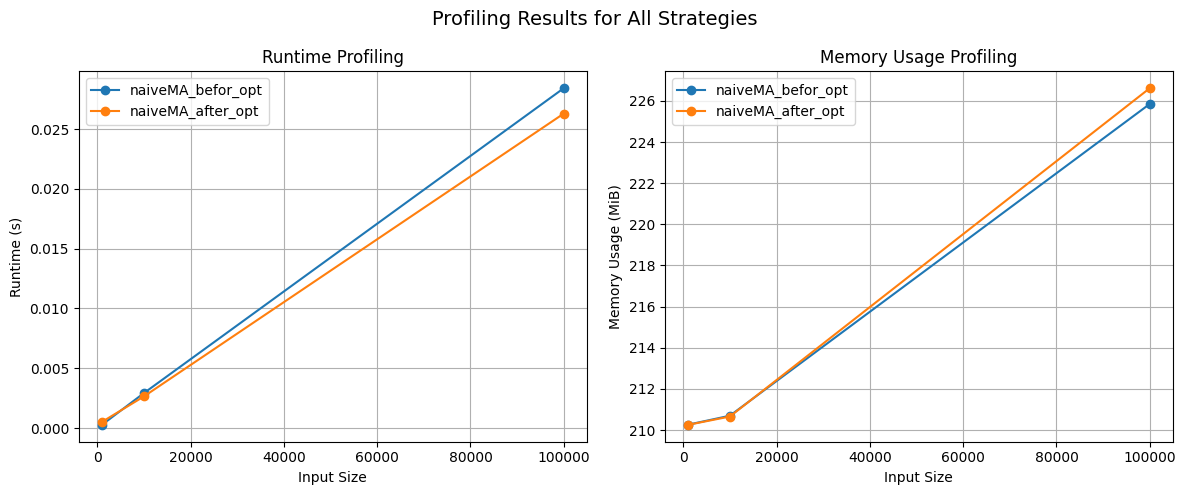

In [5]:
input_sizes = [1000, 10_000, 100_000]
strategies_info = {
        'naiveMA_befor_opt': {
            'strategy': WindowedMovingAverageStrategy(),
            'runtime_summary': [],
            'memory_summary': [],
            'input_sizes': input_sizes
        },
        'naiveMA_after_opt': {
            'strategy': WindowedMovingAverageStrategy_Opt(),
            'runtime_summary': [],
            'memory_summary': [],
            'input_sizes': input_sizes
        },
    }
# to generate graph excpet print output from 'calculate_profile' function.
f = io.StringIO()
with contextlib.redirect_stdout(f):
    for strategy_map in strategies_info.values():
        strategy = strategy_map['strategy']
        for tick_size in strategy_map['input_sizes']:
            profile = calculate_profile(strategy.generate_signals, data_points, tick_size=tick_size)
            strategy_map['runtime_summary'].append(profile['timeit'])
            strategy_map['memory_summary'].append(profile['memory_usage'])

# output results
plot_profile_by_input(strategies_info)

%%markdown

# Windowed Moving Average Strategy: Original vs Incremental Average (100K ticks)

<table>
<tr>
<th>Strategy</th>
<th>Execution Time (s)</th>
<th>Peak Memory (MiB)</th>
</tr>
<tr>
<td>WindowedMovingAverageStrategy (Original)</td>
<td>0.0296</td>
<td>225.83</td>
</tr>
<tr>
<td>WindowedMovingAverageStrategy_Opt (Incremental Avg)</td>
<td>0.0249</td>
<td>225.79</td>
</tr>
</table>

<p style="font-size:0.9em;">
- Both strategies already use deque for sliding window.<br>
- Incremental average slightly faster, but **practical difference negligible** at 100K ticks.<br>
- Memory usage almost identical.<br>  
- Conclusion: Algorithmically optimized, but original WindowedMA already efficient (O(1) per tick, O(window) memory).<br>
</p>
